In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "-1"  # Set to 1 or the desired number of cores


In [7]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype('float32')  # Keep the original float values
y = mnist.target.astype(int)  # Convert target to integer

# Apply Min-Max Scaling to ensure values are between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Add a small constant to ensure strictly positive values
X_positive = X_scaled + 1e-6  # Add a small constant to avoid zeros, lda doesnt accept 0 and negetive values

# Check if the minimum value is now strictly positive
min_value = np.min(X_positive)
max_value = np.max(X_positive)

print(f"Shape of dataset after scaling and adding constant: {X_positive.shape}")
print(f"Minimum value after adding constant: {min_value}")
print(f"Maximum value after adding constant: {max_value}")




Shape of dataset after scaling and adding constant: (70000, 784)
Minimum value after adding constant: 9.999999974752427e-07
Maximum value after adding constant: 1.0000009536743164


In [15]:
# Apply PCA to reduce the number of features (e.g., to 100 components)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

print(f"Shape after PCA: {X_pca.shape}")


Shape after PCA: (70000, 1)


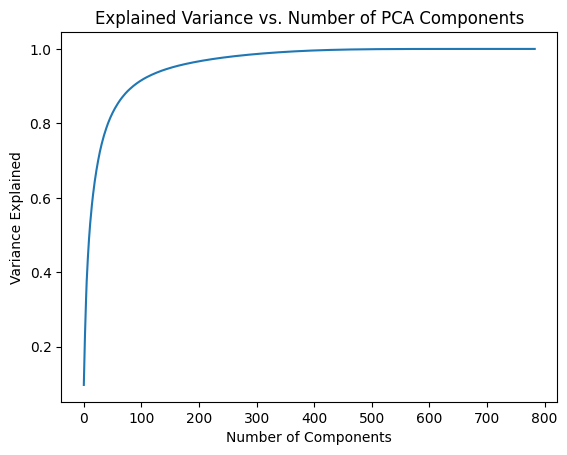

In [16]:
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance vs. Number of PCA Components')
plt.show()


In [ ]:
# Initialize LDA with 10 topics (since we have 10 digits)
lda = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit LDA to the dataset with strictly positive values
lda.fit(X_positive)

# Get the transformed data (topic distribution for each sample)
X_lda = lda.transform(X_positive)

print("LDA model fitted successfully!")

